Try to build a classifier for the MNIST dataset that achieves over 97%
accuracy on the test set. Hint: the KNeighborsClassifier works quite well
for this task; you just need to find good hyperparameter values (try a
grid search on the weights and n_neighbors hyperparameters).


In [1]:
# Get data
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', as_frame=False)

f:\Projects\machineLearningFundamental\venv\lib\site-packages\sklearn\datasets\_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


In [2]:
X, y = mnist.data, mnist.target

In [4]:
X.shape

(70000, 784)

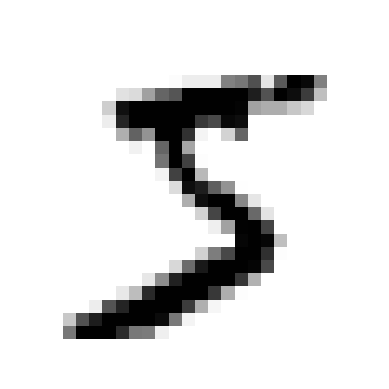

In [3]:
# Visualize data

import matplotlib.pyplot as plt
def plot_digit(data):
    image = data.reshape(28,28)
    plt.imshow(image, cmap='binary')
    plt.axis('off')
    plt.show()
    
plot_digit(X[0])

In [6]:
# split train and test set
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

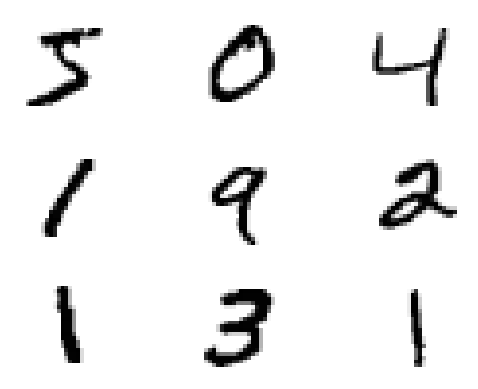

In [10]:
rows, cols = 3, 3

fig, axes = plt.subplots(rows, cols)

# Display the images
for i in range(rows):
    for j in range(cols):
        axes[i, j].imshow(X[i*cols+j].reshape(28,28), cmap='binary')
        axes[i, j].axis('off')

plt.show()

In [12]:
# Train model
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()

knn.fit(X_train, y_train)
prediction = knn.predict(X_test)

In [13]:
# Test model
from sklearn.metrics import accuracy_score

print(accuracy_score(prediction, y_test))

0.9688


Our target is to get the accuracy over 97%, so we will use Grid Search on 2 parameters (weights, n_neighbors) to tune our model

In [15]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_neighbors': [3,5,7],
    'weights': ['uniform', 'distance']
}

grid_search = GridSearchCV(knn, param_grid, cv=3)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [3, 5, 7],
                         'weights': ['uniform', 'distance']})

In [16]:
print(grid_search.best_params_)
grid_search.score(X_test, y_test)

{'n_neighbors': 3, 'weights': 'distance'}


0.9717